In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, math, cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import zipfile

TRAIN_DIR = '../input/dogs-vs-cats/train.zip'
TEST_DIR = '../input/dogs-vs-cats/test1.zip'

def unzipping_files(path_to_zip_file):
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall('.')
        
unzipping_files(TRAIN_DIR)
unzipping_files(TEST_DIR)

print('Done !!')

Done !!


In [3]:
TRAIN_DIR = '/kaggle/working/train'
TEST_DIR = '/kaggle/working/test1'

for dirname, _, filenames in os.walk(TRAIN_DIR):
    print(len(filenames),dirname)
    train_filenames = filenames
    
for dirname, _, filenames in os.walk(TEST_DIR):
    print(len(filenames),dirname)
    test_filenames = filenames
    
print(train_filenames[:5])
print(test_filenames[:5])

25000 /kaggle/working/train
12500 /kaggle/working/test1
['dog.10348.jpg', 'dog.568.jpg', 'cat.2692.jpg', 'cat.688.jpg', 'dog.4850.jpg']
['9603.jpg', '11910.jpg', '12437.jpg', '6485.jpg', '1833.jpg']


In [4]:
def get_labels_of_training_data(train_filenames):
    train_data_labels=[]
    for file in train_filenames:
        train_data_labels.append(file.split('.')[0])
    return train_data_labels

In [5]:
train_df = pd.DataFrame(data = {'image' : train_filenames,
                        'label' : get_labels_of_training_data(train_filenames)})
train_df

,image,label
0,dog.10348.jpg,dog
1,dog.568.jpg,dog
2,cat.2692.jpg,cat
3,cat.688.jpg,cat
4,dog.4850.jpg,dog
...,...,...
24995,dog.6612.jpg,dog
24996,cat.3395.jpg,cat
24997,cat.2413.jpg,cat
24998,dog.4413.jpg,dog


In [6]:
train_df, val_df = train_test_split(train_df, test_size=0.2)
train_df

,image,label
8725,cat.6652.jpg,cat
14390,dog.11808.jpg,dog
23019,dog.7175.jpg,dog
23525,dog.5168.jpg,dog
20602,dog.5352.jpg,dog
...,...,...
11588,dog.6365.jpg,dog
15034,cat.1602.jpg,cat
23937,cat.11822.jpg,cat
1583,cat.10345.jpg,cat


In [7]:
val_df

,image,label
9455,dog.7492.jpg,dog
455,cat.11079.jpg,cat
15997,cat.5706.jpg,cat
2581,cat.4739.jpg,cat
11173,cat.10492.jpg,cat
...,...,...
14785,dog.7890.jpg,dog
16331,cat.6239.jpg,cat
22607,cat.9269.jpg,cat
8280,dog.1657.jpg,dog


cat.1943.jpg


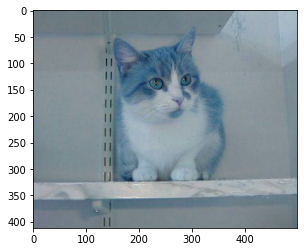

cat.3904.jpg


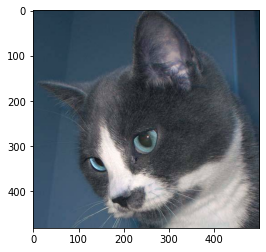

cat.3082.jpg


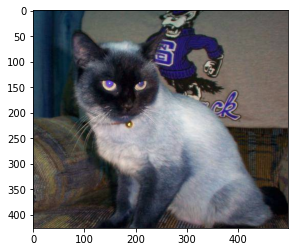

In [8]:
for file in train_df.image[15645:15648]:
    print(file)
    plt.imshow(cv2.imread(os.path.join(TRAIN_DIR,file)))
    plt.show()

In [9]:
train_gen = ImageDataGenerator(rotation_range = 45,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  rescale = 1./255.,
                                  horizontal_flip = True,
                                  )
val_gen = ImageDataGenerator(rescale = 1./255.)

In [10]:
train_data = train_gen.flow_from_dataframe(dataframe = train_df,
                                           directory = TRAIN_DIR,
                                           x_col = 'image', y_col = 'label',
                                           class_mode = 'binary',
                                           target_size=(202,202) 
                                          )
val_data = val_gen.flow_from_dataframe(dataframe = val_df,
                                       directory = TRAIN_DIR,
                                       x_col = 'image', y_col = 'label',
                                       class_mode = 'binary',
                                       target_size=(202,202)
                                      )
train_data.class_indices

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


{'cat': 0, 'dog': 1}

In [11]:
sample_submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
sample_submission

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [12]:
test_df = pd.DataFrame({'id' : [int(element.split('.')[0]) for element in os.listdir(TEST_DIR)],
                       'label' : ['0' for _ in range(12500)]})
test_df.sort_values('id',inplace=True,ascending=True)
test_df.reset_index(drop=True,inplace=True)
test_df

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [13]:
test_df.id = test_df.id.astype(str)
print(type(test_df.id[2332]))
print(type(test_df.label[2332]))
print(test_df.label[2332])
test_df.label[2332] = '1'
print(test_df.label[2332])

<class 'str'>
<class 'str'>
0
1


In [14]:
test_df.id = test_df.id + '.jpg'
test_df

,id,label
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0
...,...,...
12495,12496.jpg,0
12496,12497.jpg,0
12497,12498.jpg,0
12498,12499.jpg,0


In [15]:
test_data = val_gen.flow_from_dataframe(dataframe = test_df,
                                       directory = TEST_DIR,
                                       x_col = 'id', 
                                        y_col = 'label',
                                       class_mode = 'binary',
                                       target_size=(202,202)
                                      )
test_data.class_indices

Found 12500 validated image filenames belonging to 2 classes.


{'0': 0, '1': 1}

In [16]:
os.listdir(TEST_DIR)[:10]

['9603.jpg',
 '11910.jpg',
 '12437.jpg',
 '6485.jpg',
 '1833.jpg',
 '11432.jpg',
 '262.jpg',
 '11310.jpg',
 '6102.jpg',
 '4238.jpg']

In [17]:
TEST_DIR

'/kaggle/working/test1'

In [18]:
img_cat = load_img(TRAIN_DIR+'/'+'cat.10009.jpg')
img_dog = load_img(TRAIN_DIR+'/'+'dog.1283.jpg')

img_cat_arr = image.img_to_array(img_cat)
img_cat_arr = img_cat_arr.reshape((1,)+img_cat_arr.shape)

img_dog_arr = image.img_to_array(img_dog)
img_dog_arr = img_dog_arr.reshape((1,)+ img_dog_arr.shape)

aug_images_cat = train_gen.flow(img_cat_arr)
aug_images_dog = train_gen.flow(img_dog_arr)

In [19]:
next(aug_images_cat)[0].shape

(500, 472, 3)

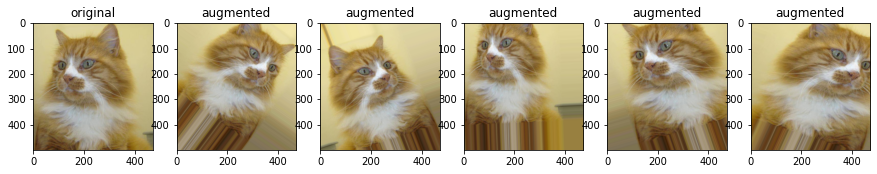

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(161)
plt.imshow(img_cat)
plt.title("original")
i=2
num=0
for batch in aug_images_cat:
    plt.subplot(16*10+i)
#     print("batch = ", batch.shape)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title("augmented")
#     plt.show()
    i += 1
    if i % 7 == 0:
        break

In [21]:
def get_model(image_shape):
    inputs = keras.Input(shape = (image_shape))
    x = tfl.Conv2D(32, (4,4), activation='relu')(inputs)
    x = tfl.MaxPool2D(pool_size=(2,2))(x)
    
    x = tfl.Conv2D(64, (4,4), activation='relu')(inputs)
    x = tfl.MaxPool2D(pool_size=(2,2))(x)
    
    x = tfl.Conv2D(64, (4,4), activation='relu')(x)
    x = tfl.MaxPool2D(pool_size=(2, 2))(x)
    
    x = tfl.Conv2D(128, (4,4), activation='relu')(x)
    x = tfl.MaxPool2D(pool_size=(2, 2))(x)
    
    x = tfl.Flatten()(x)
    
#     x = tfl.Dense(256,activation='relu')(x)
    x = tfl.Dense(128,activation='relu')(x)
    
    outputs = tfl.Dense(1,activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

In [22]:
final_model = get_model((256,256,3))
final_model.summary()
# del final_model
final_model

2022-02-16 15:19:04.126067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 15:19:04.245578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 15:19:04.246312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 15:19:04.247413: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 64)      3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 64)      65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 128)       131200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 128)       0     

In [23]:
from tensorflow.keras import layers
def get_model_new():
    best_model = keras.models.Sequential()
    best_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(202,202, 3)))
    best_model.add(layers.MaxPooling2D((2, 2),strides=2))

    best_model.add(layers.Conv2D(64, (3,3), activation='relu'))
    best_model.add(layers.MaxPooling2D((2, 2),strides=2))

    best_model.add(layers.Conv2D(128, (3,3),activation='relu'))
    best_model.add(layers.MaxPooling2D((2, 2),strides=2))

    best_model.add(layers.Conv2D(128, (3,3),activation='relu'))
    best_model.add(layers.MaxPooling2D((2, 2),strides=2))

    best_model.add(layers.Conv2D(256, (3,3),activation='relu'))
    best_model.add(layers.MaxPooling2D((2, 2),strides=1))

    best_model.add(layers.Flatten())
    best_model.add(layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    best_model.add(layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    best_model.add(layers.Dropout(0.2))
    best_model.add(layers.Dense(1, activation='sigmoid'))
    return best_model

In [24]:
best_model = get_model_new()
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       1

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss='binary_crossentropy', metrics='acc')
history_2 = best_model.fit(train_data,
                           validation_data = val_data,
                           epochs=40,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

2022-02-16 15:19:06.851865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-02-16 15:19:09.101659: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


625/625 [==============================] - 225s 348ms/step - loss: 0.7179 - acc: 0.5648 - val_loss: 0.6350 - val_acc: 0.6408
Epoch 2/40
625/625 [==============================] - 216s 346ms/step - loss: 0.6229 - acc: 0.6655 - val_loss: 0.5723 - val_acc: 0.7068
Epoch 3/40
625/625 [==============================] - 216s 346ms/step - loss: 0.5811 - acc: 0.7013 - val_loss: 0.5052 - val_acc: 0.7700
Epoch 4/40
625/625 [==============================] - 216s 345ms/step - loss: 0.5408 - acc: 0.7348 - val_loss: 0.4565 - val_acc: 0.7974
Epoch 5/40
625/625 [==============================] - 217s 347ms/step - loss: 0.4977 - acc: 0.7672 - val_loss: 0.4184 - val_acc: 0.8114
Epoch 6/40
625/625 [==============================] - 216s 346ms/step - loss: 0.4712 - acc: 0.7816 - val_loss: 0.4502 - val_acc: 0.7908
Epoch 7/40
625/625 [==============================] - 216s 346ms/step - loss: 0.4377 - acc: 0.8038 - val_loss: 0.3439 - val_acc: 0.8560
Epoch 8/40
625/625 [==============================] - 215s 

In [26]:
# final_model.compile(
#                     loss=keras.losses.BinaryCrossentropy(from_logits=0),
#                     optimizer=keras.optimizers.Adam(5e-4),
#                     metrics=["accuracy"]
#                    )
#ddmddddfdddcdddsssssssfffddddddggccmmmddmmf

In [27]:
# history = final_model.fit(train_data, epochs = 1, validation_data = val_data)

In [28]:
dataset = tf.data.Dataset.range(10)
window_size = 3
key_func = lambda x: x%2
reduce_func = lambda key, dataset: dataset.batch(window_size)
dataset = dataset.group_by_window(
          key_func=key_func,
          reduce_func=reduce_func,
          window_size=window_size)
for elem in dataset.as_numpy_iterator():
  print(elem)
dataset.options()

[0 2 4]
[1 3 5]
[6 8]
[7 9]


In [30]:
history_2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

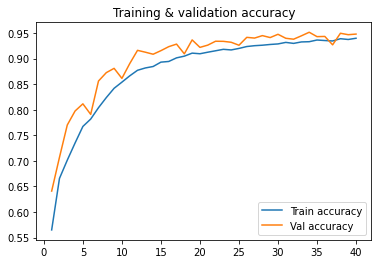

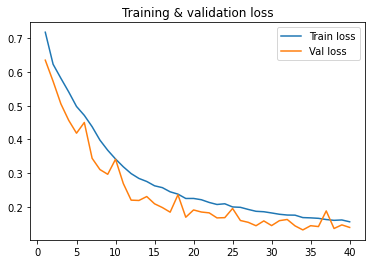

In [31]:
# history = keras.callbacks.History(0x7f0c5a7c9ad0)
# history = <keras.callbacks.History at >

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()
# history.history

In [32]:
best_model.save('best_model_cat_vs_dog.h5')
best_model.save_weights('best_model_cat_vs_dog_weights.h5')

In [33]:
new_model = tf.keras.models.load_model('best_model_cat_vs_dog.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       1

In [35]:
test_pred = new_model.predict(test_data)
test_pred

array([[2.9134432e-08],
       [1.0346147e-07],
       [8.7090760e-01],
       ...,
       [9.9985838e-01],
       [3.9368041e-02],
       [9.9996865e-01]], dtype=float32)

In [36]:
new_model.get_weights()[0].shape

(3, 3, 3, 32)

In [38]:
test_pred1 = new_model.evaluate(test_data)
test_pred1

391/391 [==============================] - 34s 88ms/step - loss: 4.0010 - acc: 0.4692


[4.001017093658447, 0.4691999852657318]

In [39]:
test_pred_old = best_model.predict(test_data)
test_pred_old

array([[4.1333292e-06],
       [9.9983382e-01],
       [9.9963856e-01],
       ...,
       [9.9990761e-01],
       [9.9624938e-01],
       [1.4907758e-02]], dtype=float32)

In [41]:
test_pred = (test_pred > 0.5).astype(int)
test_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [42]:
test_pred_old = (test_pred_old > 0.5).astype(int)
test_pred_old

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [43]:
submission_new = test_df.copy()
submission_recovered = test_df.copy()

In [44]:
submission_new

,id,label
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0
...,...,...
12495,12496.jpg,0
12496,12497.jpg,0
12497,12498.jpg,0
12498,12499.jpg,0


In [45]:
submission_recovered

,id,label
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0
...,...,...
12495,12496.jpg,0
12496,12497.jpg,0
12497,12498.jpg,0
12498,12499.jpg,0


In [47]:
submission_new["id"] = submission_new["id"].map(lambda x : x.split('.')[0])
submission_new

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [48]:
submission_recovered["id"] = submission_recovered["id"].map(lambda x : x.split('.')[0])
submission_recovered

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [49]:
pred_new = best_model.predict(test_data)
pred_new

array([[0.00871545],
       [0.1208196 ],
       [0.99296206],
       ...,
       [0.27521318],
       [0.99990165],
       [0.9997924 ]], dtype=float32)

In [53]:
submission_new.label = pred_new
submission_new

,id,label
0,1,8.715449e-03
1,2,1.208196e-01
2,3,9.929621e-01
3,4,9.999375e-01
4,5,9.999986e-01
...,...,...
12495,12496,5.399751e-09
12496,12497,2.862963e-01
12497,12498,2.752132e-01
12498,12499,9.999017e-01


In [54]:
pred_recovered = new_model.predict(test_data)
pred_recovered

array([[7.2302544e-01],
       [9.9998331e-01],
       [3.5466310e-02],
       ...,
       [3.5123771e-10],
       [9.9794871e-01],
       [9.9618477e-01]], dtype=float32)

In [55]:
submission_recovered.label = pred_recovered
submission_recovered

,id,label
0,1,7.230254e-01
1,2,9.999833e-01
2,3,3.546631e-02
3,4,1.580807e-01
4,5,9.732535e-01
...,...,...
12495,12496,4.220356e-05
12496,12497,1.000000e+00
12497,12498,3.512377e-10
12498,12499,9.979487e-01


In [57]:
submission_new.to_csv('/kaggle/working/submission_new.csv', index=False)
submission_recovered.to_csv('/kaggle/working/submission_recovered.csv', index=False)

In [59]:
train_df.head()

,image,label
8725,cat.6652.jpg,cat
14390,dog.11808.jpg,dog
23019,dog.7175.jpg,dog
23525,dog.5168.jpg,dog
20602,dog.5352.jpg,dog


In [86]:
timepass = submission_recovered.sample(4)
timepass

,id,label
294,295,0.000068
9535,9536,0.002134
7436,7437,0.989751
9736,9737,0.999988


6.7605906e-05


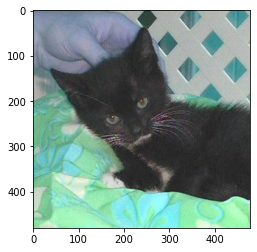

0.0021335373


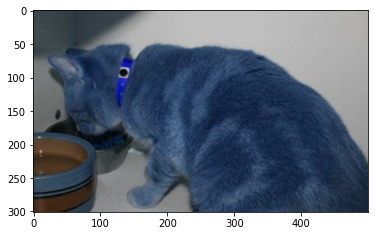

0.98975146


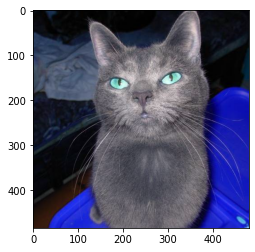

0.9999881


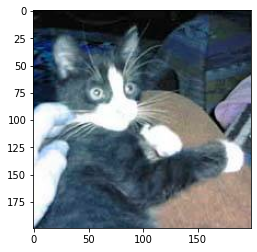

In [87]:
for i in timepass.index:
    print(timepass.loc[i].label)
    plt.imshow(cv2.imread(os.path.join(TEST_DIR,timepass.loc[i].id + '.jpg')))
    plt.show()

In [88]:
test_gen = ImageDataGenerator(rescale=1./255.)
test_data = test_gen.flow_from_dataframe(dataframe = test_df,
                                       directory = TEST_DIR,
                                       x_col = 'id', 
                                        y_col = 'label',
                                       class_mode = 'binary',
                                       target_size=(202,202)
                                      )
test_data.class_indices

Found 12500 validated image filenames belonging to 2 classes.


{'0': 0, '1': 1}

In [89]:
pred = best_model.predict(test_data)
pred

array([[9.7500277e-01],
       [2.1324752e-04],
       [1.9241031e-04],
       ...,
       [9.9986696e-01],
       [2.3560654e-06],
       [9.9981517e-01]], dtype=float32)

[0.999967]


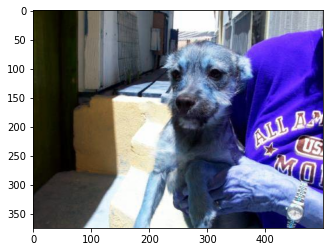

[0.8410757]


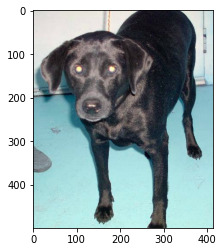

[3.2627015e-06]


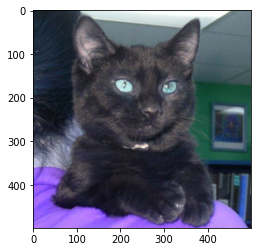

[0.99955386]


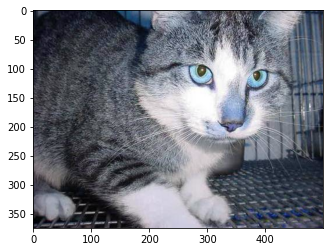

[3.449636e-07]


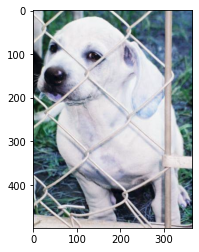

[0.00329096]


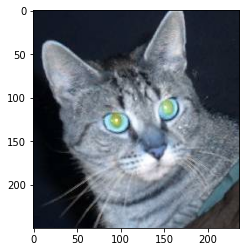

[0.02409397]


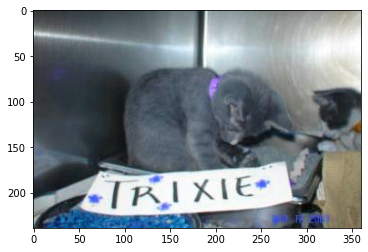

In [99]:
for i in range(11525,11532):
    print(pred[i])
    plt.imshow(cv2.imread(os.path.join(TEST_DIR,test_df.loc[i].id)))
    plt.show()

In [103]:
pred.shape

(12500, 1)

In [113]:
xxxxx = pd.DataFrame({'id' : [i+1 for i in range(12500)]})
xxxxx['label'] = pred
xxxxx

,id,label
0,1,9.750028e-01
1,2,2.132475e-04
2,3,1.924103e-04
3,4,1.350817e-10
4,5,1.141259e-05
...,...,...
12495,12496,9.890264e-01
12496,12497,2.792873e-04
12497,12498,9.998670e-01
12498,12499,2.356065e-06


In [114]:
xxxxx.to_csv('final_sub.csv',index=False)

In [115]:
test_filenames = os.listdir("/kaggle/working/test1")
submission_df = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
for i, fname in enumerate(test_filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    submission_df.at[index-1, 'label'] = pred_labels[index-1]
submission_df.to_csv('/kaggle/working/submission.csv', index=False)
submission_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/test'